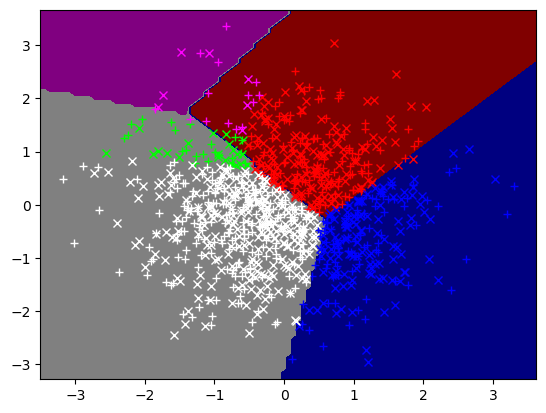

trainError = 0.084
validError = 0.07


PyObject <matplotlib.contour.QuadContourSet object at 0x7f5bc2627f98>

In [1]:
include("example_multiClass.jl")

# 3.3

In [2]:
function softmaxClassifier(X,y)

	(n,d) = size(X)
    c = maximum(y)

	# Initial guess
	w = zeros(d,c)
    wReshape = reshape(w, d*c)

	# Function we're going to minimize (and that computes gradient)
	funObj(wReshape) = softmaxObj(wReshape,X,y,c)

	# Solve least squares problem
	wReshape = findMin(funObj,wReshape,derivativeCheck=true)
    w = reshape(wReshape, d, c)
    
	# Make linear prediction function
	function predict(Xhat)
        nhat = size(Xhat, 1)
        cartesianIndices = argmax(Xhat*w, dims=2)
        ret = Array{Int64}(undef, nhat)
        for i in 1:nhat
            ret[i] = cartesianIndices[i][2]
        end
        return ret
    end
        
	# Return model
	return LinearModel(predict,w)
end

function softmaxObj(wReshape,X,y,c)
	(n,d) = size(X)
    w = reshape(wReshape, d, c)
    
    f = 0
    g = zeros(size(w))
    for i in 1:n
        Xw = X[i,:]' * w
        expXw = exp.(Xw)
        sumExp = sum(expXw)
        f += -Xw[y[i]] + log(sumExp)
        
        for j in 1:c
            if j == y[i]
                g[:,j] -= X[i,:]
            end
            g[:,j] += sumExp^-1 * expXw[j] * X[i,:]
        end    
    end
    
    greshape = reshape(g, d*c)
    return (f,greshape)
end

softmaxObj (generic function with 1 method)

User and numerical derivatives agree
Backtracking
Backtracking
Backtracking
Backtracking
     1     3.95569e-02     5.79834e+02     6.42191e+01
     2     3.12546e-02     2.77617e+02     2.87768e+01
     3     3.95133e-02     1.30118e+02     2.53022e+01
     4     3.13033e-02     9.61910e+01     1.04404e+01
     5     2.14559e-02     8.99937e+01     6.31620e+00
     6     2.16706e-02     8.67271e+01     5.19448e+00
     7     7.83483e-02     8.43329e+01     4.84281e+00
     8     2.32863e-01     7.75010e+01     3.57628e+00
     9     6.90007e-02     6.86333e+01     6.49316e+00
Backtracking
    10     1.96333e-02     6.72045e+01     2.53625e+00
    11     2.12928e-02     6.67883e+01     2.61098e+00
    12     1.91516e-01     6.63825e+01     2.54254e+00
    13     4.21610e-01     6.30707e+01     2.10881e+00
    14     7.94177e-02     5.79171e+01     2.58078e+00
    15     3.24326e-02     5.73163e+01     4.03645e+00
    16     2.30425e-02     5.65307e+01     1.83826e+00
    17     2.03124

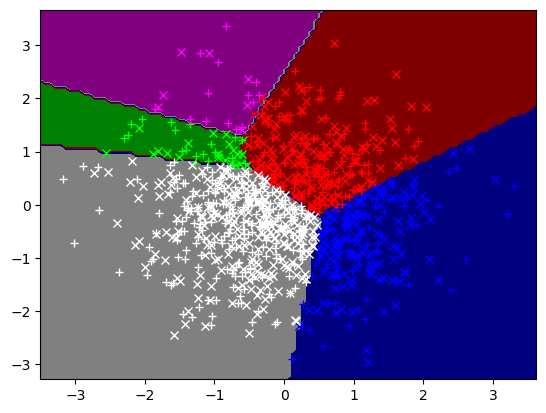

0.004
validError = 0.026


PyObject <matplotlib.contour.QuadContourSet object at 0x7f5bc23702b0>

In [3]:
using Statistics

# Load X and y variable
using JLD
data = load("multiData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Data is already roughly standardized, but let's add bias
n = size(X,1)
X = [ones(n,1) X]

# Do the same transformation to the test data
t = size(Xtest,1)
Xtest = [ones(t,1) Xtest]

# Fit one-vs-all logistic regression model
model = softmaxClassifier(X,y)

# Compute training and validation error
yhat = model.predict(X)
trainError = mean(yhat .!= y)
@show(trainError)
yhat = model.predict(Xtest)
validError = mean(yhat .!= ytest)
@show(validError)

# Plot results
k = maximum(y)
include("plot2Dclassifier.jl")
plot2Dclassifier(X,y,model,Xtest=Xtest,ytest=ytest,biasIncluded=true,k=5)
